In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data1.csv")

In [2]:
df.head()

,VC,FYM,Soil,MC
0,16,16,68,19.5
1,16,16,68,20.2
2,16,16,68,19.3
3,16,16,68,19.9
4,16,16,68,20.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VC      100 non-null    int64  
 1   FYM     100 non-null    int64  
 2   Soil    100 non-null    int64  
 3   MC      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [4]:
df = df.dropna()
df.isnull().sum()

VC      0
FYM     0
Soil    0
MC      0
dtype: int64

In [5]:
#fig, ax = plt.subplots(1,1, figsize=(12, 7))
#df.boxplot('Tractor_PTO', 'FC', ax=ax)
#plt.suptitle('Tractor_PTO Vs. FC')
#plt.title('')
#plt.ylabel('Tractor_PTO')
#plt.xticks(rotation=90)
#plt.show()

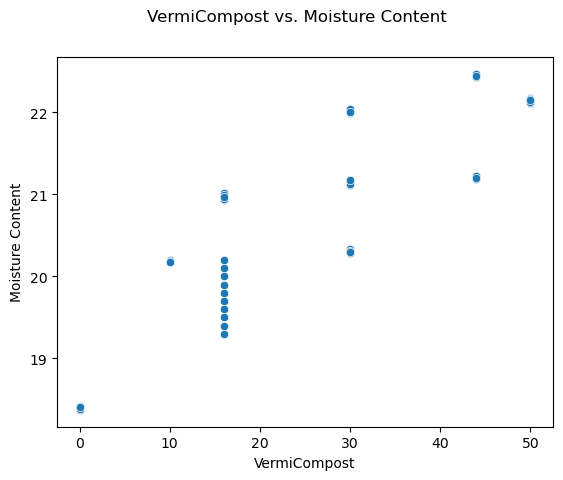

In [6]:
sns.scatterplot(x="VC", y="MC", data=df)
plt.suptitle('VermiCompost vs. Moisture Content')
plt.title('')
plt.ylabel('Moisture Content')
plt.xlabel('VermiCompost')
plt.show()

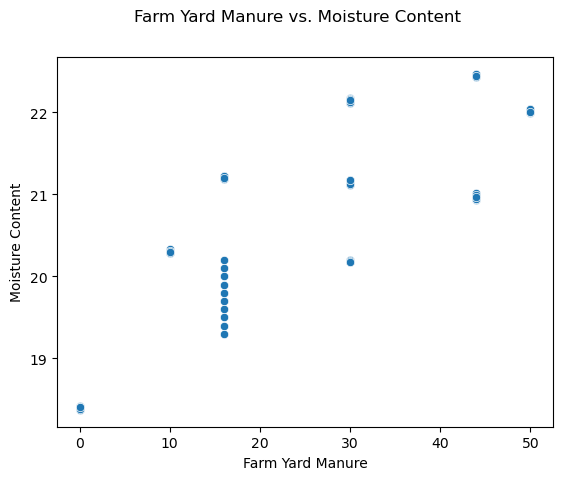

In [7]:
sns.scatterplot(x="FYM", y="MC", data=df)
plt.suptitle('Farm Yard Manure vs. Moisture Content')
plt.title('')
plt.ylabel('Moisture Content')
plt.xlabel('Farm Yard Manure')
plt.show()

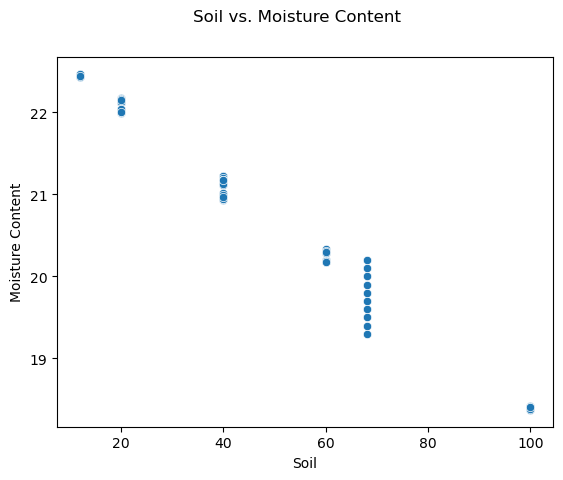

In [8]:
sns.scatterplot(x="Soil", y="MC", data=df)
plt.suptitle('Soil vs. Moisture Content')
plt.title('')
plt.ylabel('Moisture Content')
plt.xlabel('Soil')
plt.show()

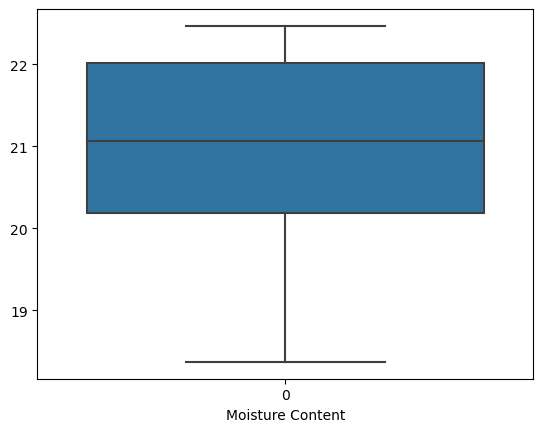

In [9]:
sns.boxplot( df['MC'])
plt.xlabel('Moisture Content')
plt.show()

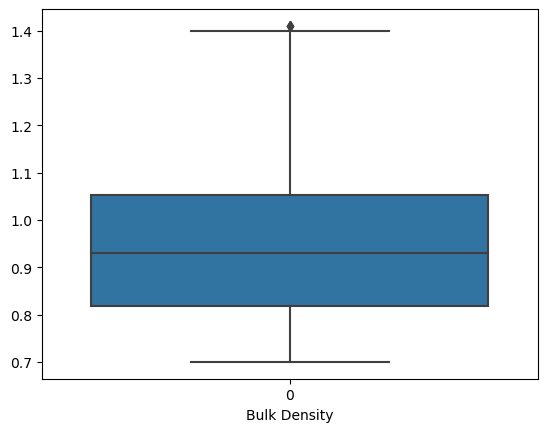

In [10]:
sns.boxplot( df['BD'])
plt.xlabel('Bulk Density')
plt.show()

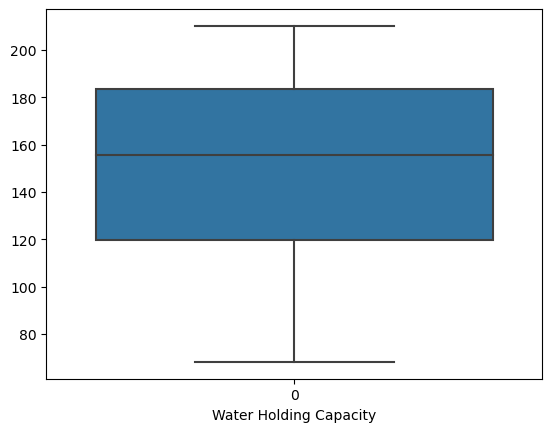

In [11]:
sns.boxplot( df['WHC'])
plt.xlabel('Water Holding Capacity')
plt.show()

In [17]:
X = df.drop("MC", axis=1)
y = df["MC"]

In [18]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [19]:
y_pred = linear_reg.predict(X)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error

0.09857587778055338

In [21]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [22]:
y_pred = dec_tree_reg.predict(X)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error

0.003240370349203998

In [24]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [25]:
y_pred = random_forest_reg.predict(X)

In [30]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

0.003785938897200305

In [26]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("L/h{:,.02f}".format(error))

L/h0.04


In [27]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [28]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("L/h{:,.02f}".format(error))

L/h0.00


In [ ]:
X

In [ ]:
X = np.array([['24.8', '1500','233' ]])
X

In [ ]:
y_pred = regressor.predict(X)
y_pred

In [ ]:
y_pred = random_forest_reg.predict(X)
y_pred

In [ ]:
y_pred = dec_tree_reg.predict(X)
y_pred

In [29]:
import pickle

In [ ]:
data = {"model": regressor}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]


In [ ]:
y_pred = regressor_loaded.predict(X)
y_pred

In [ ]:
data = {"model2": random_forest_reg}
with open('saved_steps2.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps2.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded2 = data["model2"]

In [ ]:
y_pred = regressor_loaded2.predict(X)
y_pred

In [31]:
data = {"model3": dec_tree_reg}
with open('mc1.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('mc1.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded3 = data["model3"]

In [ ]:
y_pred = regressor_loaded3.predict(X)
y_pred